In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
delivery_time = pd.read_csv('delivery_time.csv')
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## Assumption check

#### Linearity check

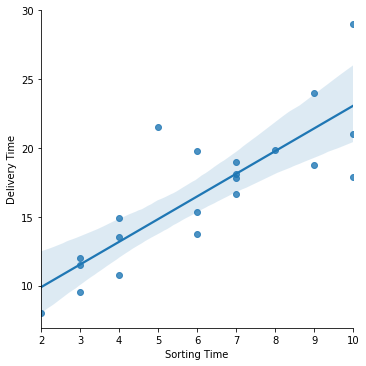

In [6]:
sns.lmplot(data = delivery_time, x = 'Sorting Time', y = 'Delivery Time')
plt.show()

##### OBSERVATION 
Linearity check **failed**

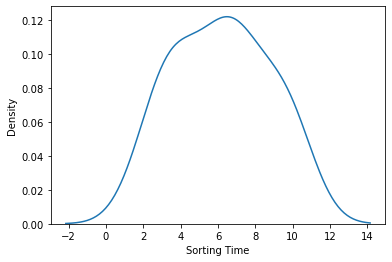

In [11]:
sns.distplot(a = delivery_time['Sorting Time'],hist=False)
plt.show()

### MultiCollinearity check

MultiCollinearity only performed in multilinear regression

### No autoregression

autoregression **failed**

### Homoscadascity Check | 6. Zero Residual Mean Check
it performed in post modeling

## Model building

In [33]:
X = delivery_time[['Sorting Time']]
y = delivery_time[['Delivery Time']]
X

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [54]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X,y)

LinearRegression()

In [55]:
y_pred_test = lin_model.predict(X)
y_pred_test

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [56]:
error =  y - y_pred_test
error

,Delivery Time
0,-2.072933
1,0.321186
2,3.273147
3,2.576087
4,5.927067
5,-1.126853
6,0.874127
7,-2.029794
8,-5.172933
9,-2.673913


### Homoscadascity check

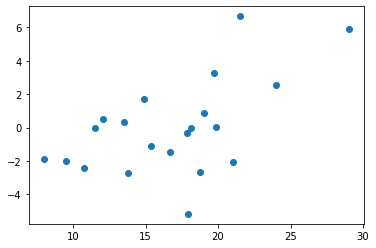

In [57]:
plt.scatter(x = y ,y = error)

##### OBSERVATION
homoscadascity check **failed**

### Zero residul test

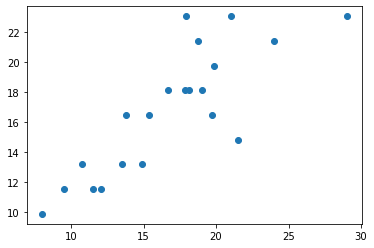

In [58]:
plt.scatter(x = y, y = y_pred_test)

##### OBSERVATION
Zero residual test **failed**

In [62]:
delivery_time_copy = delivery_time

In [63]:
delivery_time_copy['log_Sorting_time'] = np.log(delivery_time['Sorting Time'])
delivery_time_copy

,Delivery Time,Sorting Time,log_Sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


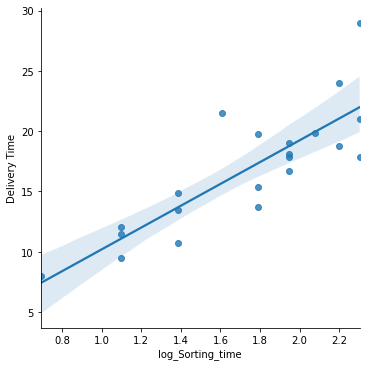

In [65]:
sns.lmplot(data = delivery_time, x = 'log_Sorting_time', y = 'Delivery Time')
plt.show()